In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import pickle

In [3]:
df=pd.read_csv("../data/EDAed_city_day.csv")

In [4]:
# --- Step 1: I'll define my features and target ---
# The feature list includes the categorical 'City' column.
features = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
            'Month', 'Year', 'AQI_lag_1', 'AQI_rolling_7', 'PM2.5_rolling_7']
target = 'AQI'

X = df[features]
y = df[target]

In [5]:
# --- Step 2: I'll split the data BEFORE any processing ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
# --- Step 3: I'll handle the categorical 'City' column with TargetEncoder ---
# I'm specifying the column to encode. The encoder will automatically handle the rest.
encoder = TargetEncoder(target_type='continuous')

# I'll fit the encoder on the training data to learn the city-AQI relationship.
encoder.fit(X_train[['City']], y_train)

# Now I'll transform both the training and test sets.
X_train['City'] = encoder.transform(X_train[['City']])
X_test['City'] = encoder.transform(X_test[['City']])

In [7]:
# --- Step 4: I'll scale all the numerical features ---
scaler = StandardScaler()

# I'll fit the scaler ONLY on the training data.
scaler.fit(X_train)

# Now I'll transform both sets.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

# --- Step 5: I'll train the Linear Regression model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete.")

Model training complete.


In [9]:
# --- Step 6: I'll evaluate the final model ---
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Final Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Final Model Performance ---
Mean Absolute Error (MAE): 21.83
R-squared (R²): 0.87


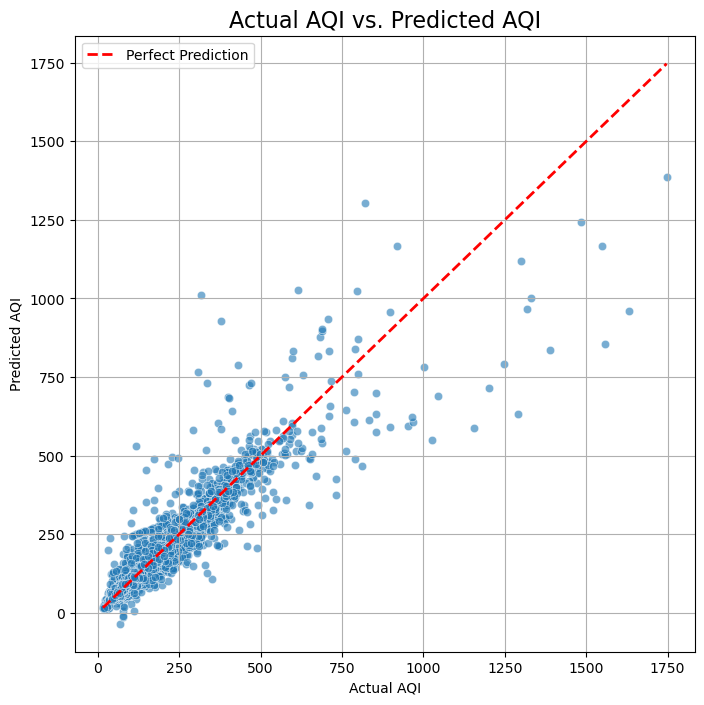

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# I'll add a red dashed line representing a perfect prediction (y=x).
# The closer the blue dots are to this line, the better the model's accuracy.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.title('Actual AQI vs. Predicted AQI', fontsize=16)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("../images/actual_vs_predicted.png", dpi=300)

A tight cluster of points running along the red diagonal line. This indicates that your predictions are very close to the actual values.

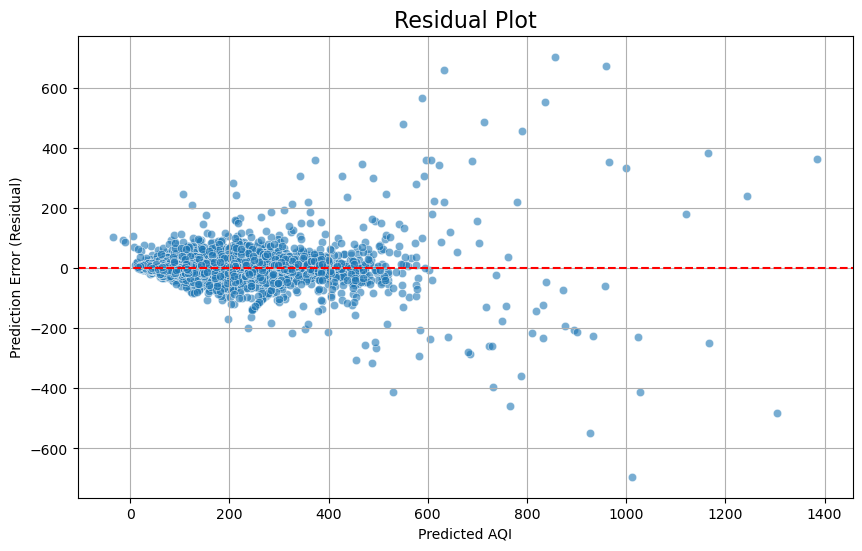

In [12]:
# First, I need to calculate the errors (residuals).
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=errors, alpha=0.6)

# I'll add a horizontal line at y=0 to represent zero error.
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted AQI')
plt.ylabel('Prediction Error (Residual)')
plt.grid(True)
plt.show()

In [14]:
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('../models/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)